# Calculus I - Sympy Evaluatie Januari 2026

## Naam: Afzal

## Voornaam: Daoud

## Studentennummer: r1113668

### Algemene instructies
<ol>
    <li> Lees de algemene instructies. </li>
    <li> Vul je naam en voornaam in. Je kan dubbelklikken op bovenstaande cellen, tekst invoeren en deze dan terug uitvoeren. </li>
    <li> Verander de naam van dit werkblad in `sympy_calculus1_NaamVoornaam` waarbij je op de plaats van "NaamVoornaam" uiteraard je eigen naam invult. </li>
    <li> Lees eerst alle vragen na voordat je aan het examen begint en kijk of je alles begrepen hebt. </li>
    <li> Begin met de vragen waar je vertrouwd mee bent voordat je aan de moeilijkere vragen begint.</li>
    <li> <strong>Zorg ervoor dat je worksheet geen foutmeldingen geeft wanneer je deze herstart en volledig laat uitvoeren. Je kan dit nakijken door bovenaan op "Kernel" te klikken, en vervolgens "Restart & Run All".</strong></li>
</ol>

Je krijgt **1 uur** de tijd voor dit examen. Nadien dien je het ingevulde werkblad (het `.ipynb` bestand) in via de daarvoor voorziene tool op Toledo.

<font color="red">Je kan maar 1 keer indienen, zorg er dus voor dat je het juiste bestand inlevert!! Vergeet aub niet om het daadwerkelijk in te dienen! Verder is het gebruik van internet tijdens het examen om online dingen op te zoeken ten strengste verboden!</font>

Veel succes!

**&copy; 2026 Didactisch Team Calculus I. Het kopiëren, reproduceren, aanpassen, vertalen, bewerken en/of wijzigen van één of meerdere examenvragen in dit document is verboden zonder voorafgaande toestemming van de auteur(s).**

---

### Imports en nuttige symbolen

Voer onderstaand blok code uit om de nodige pakketten te importeren.

In [90]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. Gedwongen harmonische oscillator <font color='grey'>{9 pt}</font>

De *gedwongen harmonische oscillator* is een welbekend systeem uit de klassieke mechanica dat bijvoorbeeld een massa–veer-systeem beschrijft dat onderhevig is aan een externe periodieke aandrijfkracht, zoals een motor die aan een veer bevestigd is.

Als de positie van de massa wordt voorgesteld door $x(t)$, en de externe kracht een sinusvormige tijdsafhankelijkheid $\cos(\omega_f t)$ heeft, dan leidt de tweede wet van Newton tot de volgende differentiaalvergelijking van tweede orde:

$$ x''(t) + x(t) = \cos(\omega_f t). $$

Hier is $\omega_f$ de *aandrijffrequentie*. De *eigenfrequentie* van dit systeem is gekend en is gelijk aan $1$.
Wanneer de aandrijffrequentie exact *samenvalt* met de eigenfrequentie, komt het systeem in het regime van **resonantie**: de amplitude van de beweging neemt dan lineair toe in de tijd. Dit is een fundamenteel verschijnsel dat niet alleen in de mechanica voorkomt, maar ook in elektrische schakelingen, akoestiek en golfverschijnselen.

In dit probleem onderzoeken we zowel het niet-resonante als het resonante gedrag van het systeem, met behulp van expliciete oplossingen bekomen met SymPy en verschillende grafische voorstellingen.


<font color='grey'>{1 pt}</font> **Vraag 1** Definieer de differentiaalvergelijking (ODE):

Definieer in SymPy de ODE
$$ x''(t) + x(t) = \cos(\omega_f t) $$
en sla deze op in de variabele `ode`.  
Toon de vergelijking om te controleren dat ze correct is.


In [91]:
# definieer de symbolen en de functie x(t)
t = sp.symbols('t', real=True, nonnegative=True)
wf = sp.symbols('w_f')
x = sp.Function('x')

# definieer de differentiaal vergelijking
ode = sp.Eq(x(t).diff(t, 2) + x(t), sp.cos(wf*t))
ode

Eq(x(t) + Derivative(x(t), (t, 2)), cos(t*w_f))

<font color='grey'>{1 pt}</font> **Vraag 2** Los de ODE op met beginvoorwaarden:

Gebruik SymPy om deze ODE op te lossen met de beginvoorwaarden
$$ x(0)=x_0, \qquad x'(0)=v_0. $$
Geef je eindresultaat weer.


In [92]:
# definieer de symbolen
x0 = sp.symbols('x0')
v0 = sp.symbols('v0')

# zet de begin voorwaarden
bgvw = {x(0): x0, x(t).diff(t).subs(t,0):v0}

# los de ode op
ode_opl = sp.dsolve(ode, x(t), ics=bgvw)
ode_opl

Eq(x(t), v0*sin(t) + (w_f**2*x0 - x0 + 1)*cos(t)/(w_f**2 - 1) - cos(t*w_f)/(w_f**2 - 1))

<font color='grey'>{2 pt}</font> **Vraag 3:**

Fixeer de beginvoorwaarden:
$$
x_0 = 0, \qquad v_0 = 0.
$$
Plot de oplossing $x(t)$ op het interval $0 \le t \le 100$ voor de twee niet-resonante aandrijffrequenties:
$$
\omega_f = 0.5, \qquad \omega_f = 1.2.
$$

Gebruik parametersubstitutie, `lambdify` en matplotlib.  
Plaats beide grafieken in dezelfde figuur, met labels en een legende.


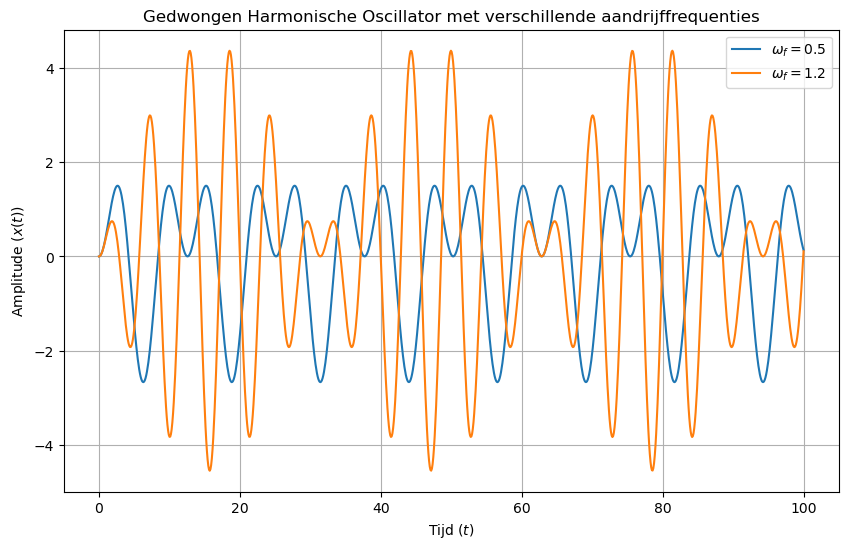

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
# ------- Vul verder aan ------- 

# fixeer de beginvoorwaarden
opl = ode_opl.subs(x0, 0)
opl = opl.subs(v0, 0)

# fixeer de 2 niet-resonante aandrijffrequenties
wf1 = opl.subs(wf, 0.5)
wf2 = opl.subs(wf, 1.2)

# bereken het op het interval [0, 100]
T = np.linspace(0, 100, 1000)
# # lambdifiy de functie om T in te vullen bij de ode's
WF1 = sp.lambdify(t, wf1.rhs, 'numpy')(T)
WF2 = sp.lambdify(t, wf2.rhs, 'numpy')(T)

# maak de grafieken
ax.plot(T, WF1, label=r'$\omega_f = 0.5$')
ax.plot(T, WF2, label=r'$\omega_f = 1.2$')

ax.set_xlabel(r'Tijd ($t$)')
ax.set_ylabel(r'Amplitude ($x(t)$)')
ax.set_title('Gedwongen Harmonische Oscillator met verschillende aandrijffrequenties')

plt.legend()
plt.grid()
plt.show()

<font color='grey'>{3 pt}</font> **Vraag 4:**

Als je de procedure van de vorige vraag herhaalt voor de aandrijffrequentie $\omega_f = 1$,
zal je merken dat het invullen van $\omega_f = 1$ in de algemene oplossing leidt tot een deling door nul of symbolische oneindigheden.

**(a)** Gebruik SymPy's `limit`-functie om de correcte resonante oplossing te berekenen voor $\omega_f \rightarrow 1$ (opnieuw met de beginvoorwaarden $x_0 = 0, v_0 = 0$).  
Toon de resonante oplossing die je gevonden hebt.

**(b)** Gebruik vervolgens deze resonante uitdrukking om de oplossing te plotten op $0 \le t \le 100$.  
Je moet hiervoor een nieuwe figuur gebruiken.

*De resonante amplitude zou moeten toenemen in de tijd.*


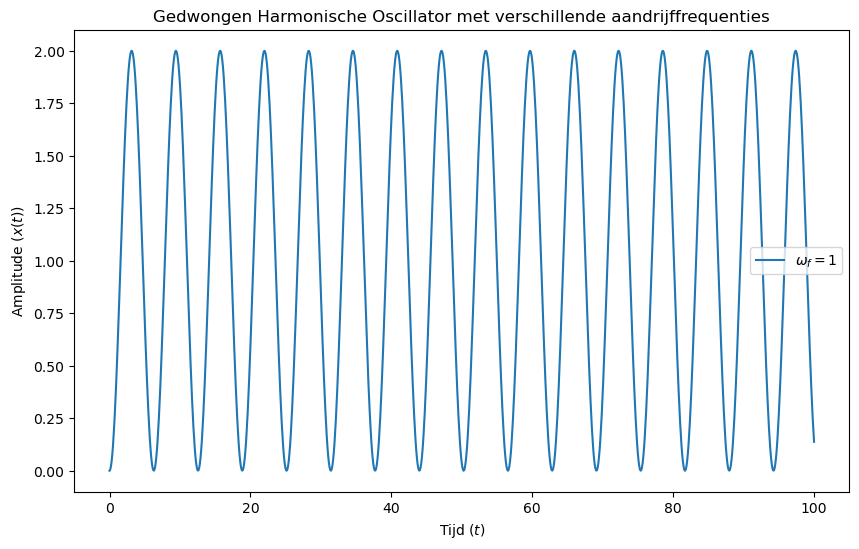

In [109]:
fig, ax = plt.subplots(figsize=(10,6))
# ------- Vul verder aan ------- 
wf3 = sp.limit(ode_opl.rhs, wf, 0)

# fixeer de beginvoorwaarden
wf3 = wf3.subs(x0, 0)
wf3 = wf3.subs(v0, 0)

# fixeer de 2 niet-resonante aandrijffrequenties


# bereken het op het interval [0, 100]
T = np.linspace(0, 100, 1000)
# # lambdifiy de functie om T in te vullen bij de ode's
WF3 = sp.lambdify(t, wf3, 'numpy')(T)

# maak de grafieken
ax.plot(T, WF3, label=r'$\omega_f = 1$')

ax.set_xlabel(r'Tijd ($t$)')
ax.set_ylabel(r'Amplitude ($x(t)$)')
ax.set_title('Gedwongen Harmonische Oscillator met verschillende aandrijffrequenties')

plt.legend()
plt.show()

<font color='grey'>{2 pt}</font> **Vraag 5:** Plot het faseportret voor de resonante respons

Een *faseportret* is een grafiek die toont hoe een dynamisch systeem evolueert in het vlak van zijn variabelen; hier de positie $x(t)$ en de snelheid $x'(t)$. In plaats van elke grootheid afzonderlijk als functie van de tijd te plotten, tekent het faseportret de kromme
$t \mapsto (x(t), x'(t))$, wat een geometrisch beeld geeft van het gedrag van het systeem. Voor lineaire oscillatoren komen gesloten lussen overeen met periodieke beweging, terwijl niet-gesloten trajecten wijzen op groei of afname in de tijd.

Voor de **resonante oplossing** uit de vorige vraag:

1. Bereken $x'(t)$ symbolisch met SymPy.  
2. Zet $x(t)$ en $x'(t)$ om naar numerieke functies met `lambdify`.  
3. Plot de parametrische kromme $t \mapsto (x(t), x'(t))$ voor $0 \le t \le 100$.  
4. Voorzie assenlabels en geef de grafiek een beschrijvende titel.


TypeError: loop of ufunc does not support argument 0 of type Zero which has no callable sin method

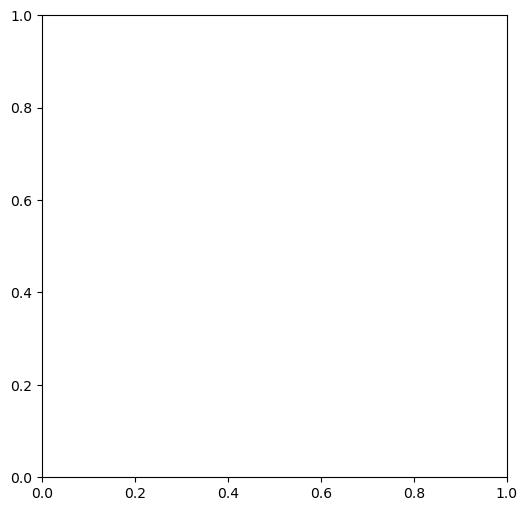

In [115]:
fig, ax = plt.subplots(figsize=(6,6))
# ------- Vul verder aan ------- 

# bereken x'(t)
eersteafgl = ode_opl.rhs.diff(t)
xt = ode_opl.rhs


t2 = np.linspace(0, 100, 100)
# lamdbify om met np te werken
AFGL = sp.lambdify(t, eersteafgl, 'numpy')(t2)
XT = sp.lambdify(t, xt, 'numpy')(t2)

# defineer t

# bereken de waardes
# r = AFGL(t2)
# s = XT(t2)

# plt.plot(s, r)

plt.show()
eersteafgl

In [112]:
xt

v0*sin(t) + (w_f**2*x0 - x0 + 1)*cos(t)/(w_f**2 - 1) - cos(t*w_f)/(w_f**2 - 1)

## 2. Numerische Benadering  <font color='grey'>{5 pt}</font>

Gegeven de volgende integraal:

$$ I = \int_0^{\pi/4} \sqrt{\tan \, x} \, \mathrm{d}x $$


Sympy kan deze integraal niet oplossen terwijl het echter wel oplosbaar is. We zullen daarom deze integraal benaderen als een eindige Riemann som:

$$ I \approx I_N = \sum_{i=0}^N \, \sqrt{\tan \, x_i} \, \Delta x $$

met $N \in \mathbb{N}_0$, $x_i = i\pi/(4N)$ en $\Delta x = \pi/(4N)$

####  <font color='grey'>{1 pt}</font> Deelvraag a
Definieer een Python functie die als argument het getal $N$ aanneemt en de corresponderende waarde $I_N$ teruggeeft. Gebruik de volgende functionaliteiten van `numpy` om de Riemann som te berekenen:

<ol>
    <li> sum </li>
    <li> arange </li>
</ol>

**Opmerking**: Houd de code  overzichtelijk. 

In [97]:
def riemann_som(N):
    # definieer de constantes
    x = np.pi/(4*N)
    delta_x = np.pi/(4*N)

    # defineer en reken de range
    lengte = np.arange(0, N, delta_x)
    deeltjes = []

    for i in lengte:
        deeltjes.append(np.sqrt(np.tan(i*x))*delta_x)

    I = sum(deeltjes)
    return I

riemann_som(1000)

620.6985060863101

####  <font color='grey'>{1 pt}</font> Deelvraag b
Gebruik je gedefinieerde functie van vraagstuk 2.a om de Riemann som $I_N$ te bepalen voor $N = 10^2, 10^3, ..., 10^7.$ Sla ieder oplossing 
$I_N$ op in een Numpy array. Toon alle resultaten.

In [ ]:
N = []
In = []
for macht in range(2, 8):
    N.append(10**macht)

for n in N:
    In.append(riemann_som(n))

In = np.array(In)
print(In)

####  <font color='grey'>{3 pt}</font> Deelvraag c
Maak een scatterplot met het pakket `matplotlib` voor de error $E(N) = \vert I - I_N \vert$ met $I = \dfrac{\pi + \ln(3 - 2\sqrt{2})}{2\sqrt{2}}$ de analytische uitkomst van bovenstaande integraal. Maak een log-log plot en beperk de plot tussen $x\in[10^1, 10^8]$ en $y\in[10^{-8}, 10^{-2}]$. Vergeet je assen niet te benoemen.

**Opmerking**: Houd de code overzichtelijk.

In [104]:
error = []
I = (np.pi + sp.ln(3-2*np.sqrt(2)))/(2*np.sqrt(2))

for i in In:
    error.append(abs(I - i))

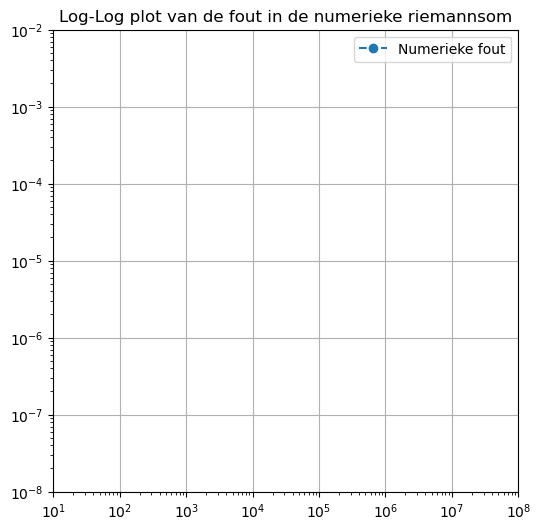

In [108]:
fig = plt.figure(figsize=(6, 6))
ax  = fig.add_subplot()
# ------- Vul verder aan ------- 

ax.loglog(N, error, 'o--', label='Numerieke fout')
ax.set_xlim(10, 10**8)
ax.set_ylim(10**-8, 10**-2)
ax.set_title('Log-Log plot van de fout in de numerieke riemannsom')
ax.legend()

# plt.title('')
plt.grid()
plt.show()